In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

import matplotlib.style as style
from matplotlib.pyplot import cm
import matplotlib
%matplotlib inline 
style.use('bmh')
matplotlib.rcParams['axes.facecolor'] = 'ffffff' 


import mplcursors

import labellines as ll 


from IPython.display import Image
from IPython.core.display import HTML 


#Toggle printing for debugging
print_on = False
def print1(something='',somethingelse=''):
    if print_on == True: print(something,somethingelse)
        
def D2A(diam):
    return (np.pi * diam**2) / 4

def A2D(area):
    return (4 * area * np.pi**-1 )**0.5

def D2Alpha(d_in,d_exit):
    return np.arctan((d_exit - d_in) / (2 * L)) * (180 / np.pi)


#Image(url= "EXAMPLE_9_8.png", width=500, height=100)




In [2]:
f=0.02 * 4
#f = 0.017
dd=3/100  # 3 cm
L = 10/100  #45 cm
M_in = 0.2880
y=1.4 

A_in = 50 / (100**2)
D_in = A2D(A_in)

#D_exit = 0.25 * y * M_in**2 * f * L + D_in
A_exit = 40 / (100**2)
D_exit = A2D(A_exit)
#D_exit = 2


A_in = D2A(D_in)
A_exit = D2A(D_exit)

#dadx= (np.pi * (D_exit**2 - D_in**2)) /  (4 * L)



In [3]:
0.1626*2

0.3252

In [4]:
################
Widg_state = 4 #
###############
if Widg_state == 1:
    display('#EXAM 2 COMP FLOW')
    widg_M0 = 5
    widg_L = 2.04
    Widg_D_in = 0.2 #A2D(50 / 100**2)
    Widg_D_exit =  0.556 #A2D(40 / 100**2)
    #Prof's answer Widg_D_exit = 0.1626*2
    widg_f = 0.005 * 4
    
elif Widg_state==2:
    display('Jones EXAMPLE 9.8 ,  PG. 318')
    widg_M0 = 0.288
    widg_L = 10/100
    Widg_D_in = A2D(50 / 100**2)
    Widg_D_exit = A2D(40 / 100**2)
    widg_f = 0
    
elif Widg_state==3:
    display('Jones EXAMPLE 9.9 ,  PG. 321')
    display('works with f = 0.02 * 1 ')
    widg_M0 = 0.6
    widg_L = 45/100
    Widg_D_in = 3/100
    Widg_D_exit = 3/100
    widg_f = 0.02 #* 4
    
elif Widg_state==4:
    display('Anderson EXAMPLE 3.17 ,  PG. 114 : DOESNT WORK')
    widg_M0 = 0.3
    widg_L = 30
    Widg_D_in = 0.15
    Widg_D_exit = 0.15
    widg_f = 0.005 * 4
    
elif Widg_state==5:
    display('Anderson EXAMPLE 3.18 ,  PG. 115')
    display('works with f = 0.005 * 1 ')
    widg_M0 = 3
    widg_L = 1.524 #m =5 ft
    Widg_D_in = 0.12192 #m =0.4 ft
    Widg_D_exit = 0.12192001 #m = 0.4 ft
    widg_f = 0.005 * 4  #GOOOD #4 #* 4

elif Widg_state==6:
    display('JAMES Prob 9.20 pg 335')
    widg_M0 = 0.5
    widg_L = 45/100 #m =5 ft
    Widg_D_in = 3/100
    Widg_D_exit = 3/100
    widg_f = 0.02 #4 #* 4
    
elif Widg_state==7:
    display('Anderson Prob 9.20 ')
    widg_M0 = 0.127
    widg_L = 40 #m =5 ft
    Widg_D_in = 0.02
    Widg_D_exit = 0.020001
    widg_f = 0.005 * 4 #4 #* 4    
    
elif Widg_state==8:
    display('Carscallen pg 255 1997: profile is linear with area not diameter! model is linear with diam ')
    widg_M0 = 0.6
    widg_L = 1.5 #m =5 ft
    Widg_D_in = 6/100
    Widg_D_exit = (4 * (0.5*D2A(Widg_D_in)+D2A(Widg_D_in)) / np.pi)**0.5
    widg_f = 0.00285 * 4 #4 #* 4   
    
elif Widg_state==9:
    display('Carscallenpg 255 1997: profile is linear with area not diameter! model is linear with diam ')
    widg_M0 = 0.6
    widg_L = 1.5 #m =5 ft
    Widg_D_in = 6/100
    Widg_D_exit = (4 * (D2A(Widg_D_in)-0.05*D2A(Widg_D_in)) / np.pi)**0.5
    widg_f = 0.00285 * 4 #4 #* 4    
    
M_in = widg_M0 
L = widg_L
D_in = Widg_D_in 
D_exit = Widg_D_exit 
f = widg_f
    

'Anderson EXAMPLE 3.17 ,  PG. 114 : DOESNT WORK'

$$
D=\left(\frac{\gamma M^{2}}{4} f\right) x+D_{o}
$$

In [5]:
slope_D = (D_exit - D_in) / L
def DofX(D_in,D_exit,x):
    return slope_D * x + D_in

#slope_A = (A_exit - A_in) / L   
def AofX(D_in,D_exit,x):
    return 0.25 * np.pi * DofX(D_in,D_exit,x)**2

def dAdx(D_in,D_exit,x):
    return 0.5 * np.pi * slope_D *DofX(D_in,D_exit,x)

In [6]:
from scipy.integrate import odeint
import numpy as N

def dm_dx_fn(M,x):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    
    a1 = M * (2 + (y-1)*M**2)
    a2 = 2*(1-M**2)
    a3 = (0.5 * y * M**2 * f) / DofX(D_in,D_exit,x)
    a4 = 1/AofX(D_in,D_exit,x)
    a5 = dAdx(D_in,D_exit,x)
    #print(a1,a2,a3,a4,a5)
    return ( a1 / a2 )  *  (a3 - a4 * a5)

A_in = D2A(D_in)
A_exit = D2A(D_exit)
a = 0           # integration limits for t
b = L

xx = N.arange(a, b, 0.001)  # values of t for
                          # which we require
                          # the solution y(t)
M = odeint(dm_dx_fn, M_in, xx)  # actual computation of y(t)

M_exit = float(M[-1])
print("M_exit = ",M[-1])

x_jones = np.arange(0,11,1) / 100
M_jones = [0.2880,0.2948,0.3018,0.3091,0.3167,0.3246,0.3328,0.3415,0.3505,0.3599,0.36982]


M_exit =  [0.47443431]


M_EXIT = [0.47443431]


'L = 30.000 '

'f = 0.020 '

'M_in = 0.300 '

'M_exit = 0.474  '

'D_in = 0.150 meters '

'D_exit = 0.150 meters '

'A_in = 0.018 meters^2 '

'A_exit = 0.018 meters^2 '

'α = 0.0 ° '

'NEED TO f*4'

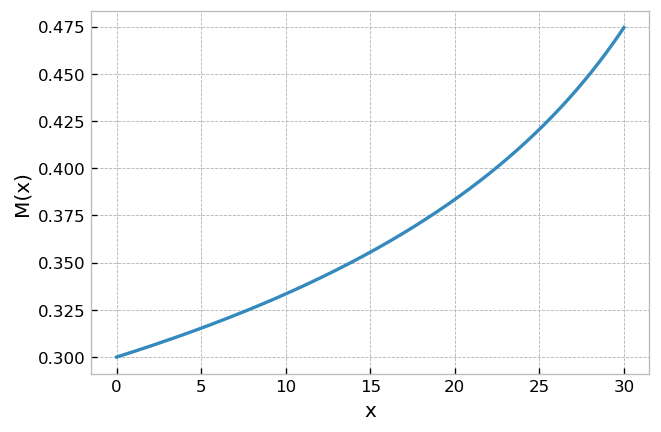

In [7]:
import pylab# plotting of results
plt.figure(dpi=120)
plt.plot(xx, M)
#plt.plot(x_jones, M_jones)
plt.xlabel('x'); pylab.ylabel('M(x)')

print('M_EXIT =',M[-1])
display('L = {:.3f} '.format(L) )
display('f = {:.3f} '.format(f) )
display('M_in = {:.3f} '.format(M_in) )
display('M_exit = {:.3f}  '.format(M_exit) )
display('D_in = {:.3f} meters '.format(D_in) )
display('D_exit = {:.3f} meters '.format(D_exit) )
display('A_in = {:.3f} meters^2 '.format(A_in) )
display('A_exit = {:.3f} meters^2 '.format(A_exit) )
display('α = {} ° '.format(D2Alpha(D_in,D_exit)) )
    
    
width_img = 520
if Widg_state == 1:
    print(1)
elif Widg_state==2:
    display(Image(url="james_ex_9_8_given.png",width=width_img))
    display(Image(url="result1.png",width=width_img))
    
elif Widg_state==3:
    display(Image(url="James_ex_9_9.png",width=width_img))    
elif Widg_state==4:
    display('NEED TO f*4')
    display(Image(url="anderson_ex_3_17.png",width=width_img))        
elif Widg_state==5:
    display(Image(url="anderson_ex_3_18.png",width=width_img))  
    
elif Widg_state==6:
    display('Anderson Prob 9.20 ,  PG. 115')
    display(Image(url="james_prob_9_20.png",width=width_img))
    
elif Widg_state==7:
    display(Image(url="anderson_prob_3_12.png",width=width_img))
    display(Image(url="anderson_prob_3_12_ans.png",width=width_img))
    
    

In [8]:

import ipywidgets as widgets
from numba import jit,njit
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import HTML, display
from IPython.display import display, Math,Markdown,Latex
import tabulate
import numpy as np
from scipy.integrate import odeint
import numpy as N
title_below = ''

import matplotlib.ticker as tk

%matplotlib inline
import mplcursors


In [9]:

def update(M0,ff,LL,D_in,D_exit,gamm):
    global D_array
    global xx
    global slope_D
    global slope_A
    global M
    global A_in
    global A_exit
    global M_in
    global f
    global L
    
    f=ff
    L=LL
    
    M_in = M0

    #A_exit = 0.25 * np.pi * D_exit**2


    slope_D = (D_exit - D_in) / L
    #slope_A = (A_exit - A_in) / L 
    
    

    #M0 = 5             # initial value
    a = 0           # integration limits for t
    b = L

    xx = N.arange(a, b, 0.001)  # values of t for
    D_array = slope_D * xx + D_in                          # which we require
                              # the solution y(t)
    M = odeint(dm_dx_fn, M0, xx)  # actual computation of y(t)
    
    A_in = D2A(D_in)
    A_exit = D2A(D_exit)
    
    M_exit = float(M[-1])
    plt.figure(dpi=100)
    plt.plot(xx,M)
    M_exit_ans = float(M[-1])
    title1 = 'M_exit = {:.3f}'.format(M_exit_ans)
    plt.title(title1 )
    plt.show()
    
    display('L = {:.3f} '.format(L) )
    display('f = {:.3f} '.format(f) )
    display('M_in = {:.3f} '.format(M0) )
    display('M_exit = {:.3f}  '.format(M_exit) )
    display('D_in = {:.3f} meters '.format(D_in) )
    display('D_exit = {:.3f} meters '.format(D_exit) )
    display('A_in = {:.3f} meters^2 '.format(A_in) )
    display('A_exit = {:.3f} meters^2 '.format(A_exit) )
    display('α = {} ° '.format(D2Alpha(D_in,D_exit)) )
    #nozz_plot_mach()
    #mplcursors.cursor(hover=True)

In [10]:
Image(url='ex_9_8.png',width=700)

In [11]:
#plt.figure()

################
Widg_state = 2 #
###############
if Widg_state == 1:
    display('#EXAM 2 COMP FLOW')
    widg_M0 = 5
    widg_L = 2.04
    Widg_D_in = 0.2 #A2D(50 / 100**2)
    Widg_D_exit = 0.28927 # 0.556 #A2D(40 / 100**2)
    widg_f = 0.005 #* 4
    
elif Widg_state==2:
    display('Jones EXAMPLE 9.8 ,  PG. 318')
    widg_M0 = 0.288
    widg_L = 10/100
    Widg_D_in = A2D(50 / 100**2)
    Widg_D_exit = A2D(40 / 100**2)
    widg_f = 0
    
elif Widg_state==3:
    display('Jones EXAMPLE 9.9 ,  PG. 321')
    display('works with f = 0.02 * 1 ')
    widg_M0 = 0.6
    widg_L = 45/100
    Widg_D_in = 3/100
    Widg_D_exit = 3/100
    widg_f = 0.02 #* 4
    
elif Widg_state==4:
    display('Anderson EXAMPLE 3.17 ,  PG. 114 : DOESNT WORK')
    widg_M0 = 0.3
    widg_L = 30
    Widg_D_in = 0.15
    Widg_D_exit = 0.15
    widg_f = 0.005 
    
elif Widg_state==5:
    display('Anderson EXAMPLE 3.18 ,  PG. 115')
    display('works with f = 0.005 * 1 ')
    widg_M0 = 3
    widg_L = 1.524 #m =5 ft
    Widg_D_in = 0.12192 #m =0.4 ft
    Widg_D_exit = 0.12192001 #m = 0.4 ft
    widg_f = 0.005  #GOOOD #4 #* 4

elif Widg_state==6:
    display('Anderson Prob 9.20 ,  PG. 115')
    widg_M0 = 0.5
    widg_L = 45/100 #m =5 ft
    Widg_D_in = 3/100
    Widg_D_exit = 3/100
    widg_f = 0.02 #4 #* 4
    
elif Widg_state==7:
    display('Anderson Prob 9.20 ')
    widg_M0 = 0.127
    widg_L = 40 #m =5 ft
    Widg_D_in = 0.02
    Widg_D_exit = 0.020001
    widg_f = 0.005 * 4 #4 #* 4    
    
interact(update, M0= widgets.FloatSlider(value=widg_M0, min=0.01, max=8, step=0.0001,continuous_update=False) ,
                 ff= widgets.FloatSlider(value=widg_f, min=0, max=1, step=0.01,continuous_update=False) ,
                 LL= widgets.FloatSlider(value=widg_L, min=0.001, max=60, step=0.0001,continuous_update=False) ,
                 D_in= widgets.FloatSlider(value=Widg_D_in, min=0.000, max=2.00,step=0.0001,continuous_update=False),
                 D_exit= widgets.FloatSlider(value=Widg_D_exit, min=0.000, max=2.00,step=0.0001,continuous_update=False),
                 gamm= widgets.FloatSlider(value=1.4, min=1, max=4, step=0.001)
        );


width_img = 500
if Widg_state == 1:
    print(1)
elif Widg_state==2:
    display(Image(url="result1.png",width=width_img))
elif Widg_state==3:
    display(Image(url="James_ex_9_9.png",width=width_img))    
elif Widg_state==4:
    display(Image(url="anderson_ex_3_17.png",width=width_img))        
elif Widg_state==5:
    display(Image(url="anderson_ex_3_18.png",width=width_img))  
    
    
elif Widg_state==7:
    display(Image(url="anderson_prob_3_12.png",width=width_img))
    display(Image(url="anderson_prob_3_12_ans.png",width=width_img))
    
    

'Jones EXAMPLE 9.8 ,  PG. 318'

interactive(children=(FloatSlider(value=0.288, continuous_update=False, description='M0', max=8.0, min=0.01, s…

In [12]:
M

array([[0.288     ],
       [0.28889876],
       [0.28980219],
       [0.29071035],
       [0.29162326],
       [0.29254096],
       [0.29346349],
       [0.29439089],
       [0.29532321],
       [0.29626049],
       [0.29720276],
       [0.29815007],
       [0.29910245],
       [0.30005995],
       [0.30102262],
       [0.30199049],
       [0.30296361],
       [0.30394201],
       [0.30492576],
       [0.30591489],
       [0.30690945],
       [0.30790948],
       [0.30891503],
       [0.30992616],
       [0.3109429 ],
       [0.31196531],
       [0.31299343],
       [0.31402732],
       [0.31506703],
       [0.31611261],
       [0.31716411],
       [0.31822158],
       [0.31928508],
       [0.32035466],
       [0.32143038],
       [0.32251229],
       [0.32360045],
       [0.32469492],
       [0.32579575],
       [0.326903  ],
       [0.32801673],
       [0.32913701],
       [0.33026389],
       [0.33139744],
       [0.33253772],
       [0.33368479],
       [0.33483872],
       [0.335

In [13]:
M_2d_imshow = 

SyntaxError: invalid syntax (<ipython-input-13-e6561ef19322>, line 1)

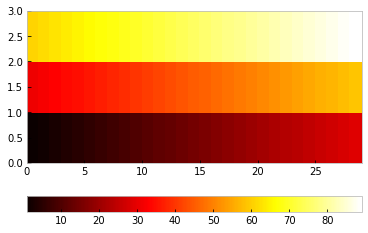

In [233]:
import pylab as plt
import numpy as np


Z=np.array((range(1,30),range(31,60),range(61,90))).transpose()

X,Y=np.meshgrid(range(Z.shape[0]+1),range(Z.shape[1]+1))
im = plt.pcolormesh(X,Y,Z.transpose(), cmap='hot')
plt.colorbar(im, orientation='horizontal')
plt.show()

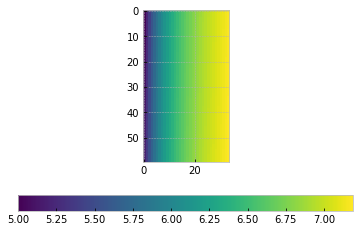

In [269]:
import matplotlib.pyplot as plt
M_2d_imshow = np.reshape(np.ndarray.flatten(M), (-1, 60))
X,Y=np.meshgrid(range(M_2d_imshow.shape[0]+1),range(M_2d_imshow.shape[1]+1))
#M_2d_imshow = np.expand_dims(M_2d_imshow, axis=0)  # or axis=1
im = plt.imshow(M_2d_imshow.T)
plt.colorbar(im, orientation='horizontal')
plt.show()

In [386]:
M_2d_imshow.shape[0]+1

35

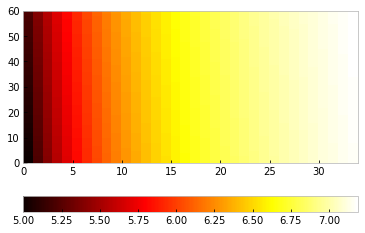

In [271]:
im = plt.pcolormesh(X,Y,M_2d_imshow.transpose(), cmap='hot')
plt.colorbar(im, orientation='horizontal')
plt.show()

In [259]:
M_2d_imshow

array([[5., 5.],
       [5., 5.],
       [5., 5.],
       ...,
       [5., 5.],
       [5., 5.],
       [5., 5.]])

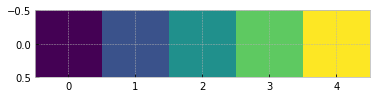

In [385]:
import matplotlib.pyplot as plt
a = np.array([1,2,3,4,5])
a = np.expand_dims(a, axis=0)  # or axis=1
plt.imshow(a)
plt.show()

In [243]:
np.size(a)

5

In [253]:
np.ndarray.flatten(M_2d_imshow)

array([5., 5., 5., ..., 5., 5., 5.])

In [ ]:
D_array = DofX(xx)



def nozz_plot_mach():


    fig3, ax3 = plt.subplots()
    plt.plot(xx,D_array,c='k')
    plt.plot(xx,-D_array,c='k')
    #plt.title('Diffuser Geometry, Mach Number \n'+title_below)
    plt.axis('equal')


    noz_mask = np.linspace(-5,5,15)
    for i in range(15):
        plt.scatter(xx,M*0 + noz_mask[i],label='M(x)',c=M,cmap='plasma',lw=12,marker='s')
    #plt.scatter(x2_array,x2_array*0 + noz_mask[i],label='M(x)',c=m2_array,cmap='plasma',lw=100,marker='s')
    #sct1 =plt.scatter(x2_array,x2_array*0+0.35,label='M(x)',c=m2_array,cmap='plasma',lw=10,marker='s')



    #FILL ABOVE NOZZLE
    ax3.fill_between(xx, D_array, 3+D_array,facecolor='white',cmap='plasma')

    #FILL BELOW NOZZLE
    ax3.fill_between(xx, -D_array, -(3+D_array),facecolor='white',cmap='plasma')

    #FILL ON LHS OF NOZZLE
    ax3.fill_between([-2,0], [-2,-2], [2,2],facecolor='white',cmap='plasma')

    #FILL ON RHS OF NOZZLE
    ax3.fill_between([L,L+1], [-2,-2], [2,2],facecolor='white',cmap='plasma')

    plt.xlim(0-L/9,L+L/9)
    plt.ylim((-(D_exit+ 0.1*D_exit),D_exit+ 0.1*D_exit))
    plt.colorbar()

    plt.show()
    

BY HAND

In [ ]:
#turb
re = 
thickness = 0.16 * 2.04 * RE***(1/7)

In [661]:
nu  = 16.97e-6  #m^2/s
U = 5 * (287 * 1.4 * 300)**0.5
DH = 0.2
RE = (U * DH) / nu
thickness = (4.19 * 2.04)  / RE**(1/2)
thickness

0.0018897411266313574